Taller Final Gradient Boosting 

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set the display options to show all the columns
pd.set_option('display.max_columns', None)

# Check the current working directory to confirm the dataset's presence
print("Current Working Directory: ", os.getcwd())

# Load and display the first few rows of the dataset
file_path = 'creditcard_2023.csv'  # assuming the file is in the current working directory
data = pd.read_csv(file_path)


# Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

# Check the shape of the data after removing duplicates
print("\nData shape after removing duplicates:", data.shape)

# Check for any missing values in the dataset
print("\nMissing values in each column:\n", data.isnull().sum())


Current Working Directory:  c:\Users\sebas\OneDrive\Escritorio\Machine Learning\TallerFinal\Credit-Card-Fraud-Detection

Number of duplicate rows: 0

Data shape after removing duplicates: (568630, 31)

Missing values in each column:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# Drop the 'id' column
data = data.drop('id', axis=1)

# Initialize a StandardScaler
scaler = StandardScaler()

# Scale the 'Amount' column
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Separate features and target variable
X = data.drop('Class', axis=1)  # features
y = data['Class']                # target variable

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and testing data
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Features Shape: (454904, 29)
Testing Features Shape: (113726, 29)
Training Labels Shape: (454904,)
Testing Labels Shape: (113726,)


Accuracy: 0.9793
Precision: 0.9886
Recall: 0.9698
F1-Score: 0.9791
ROC AUC Score: 0.9793

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

Confusion Matrix:
 [[56226   637]
 [ 1718 55145]]


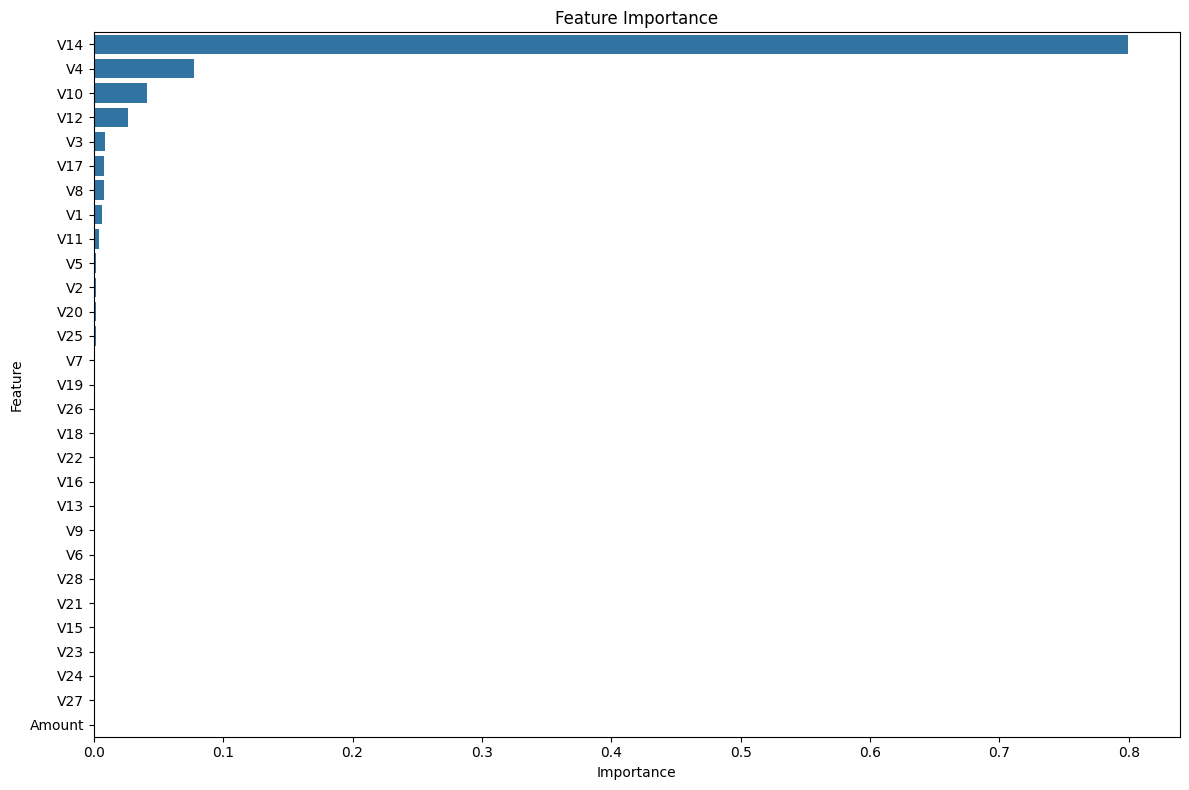

In [6]:
# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Additionally, print the classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# View the feature importances
feature_importances = gb_clf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by="Importance", ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()


Confusion Matrix:
[[56226   637]
 [ 1718 55145]]


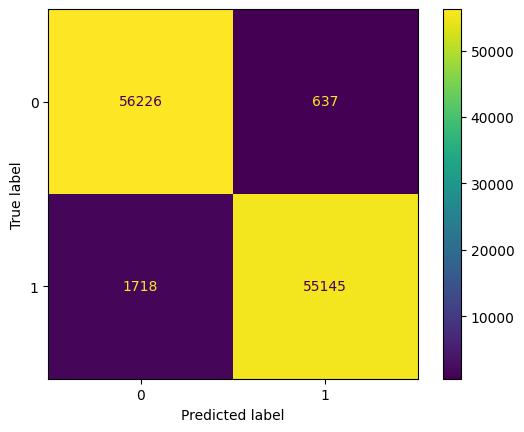

In [12]:
# Print the performance metrics.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

Best Threshold: 0.3799999999999999
Best F1-Score: 0.9822636100632249
Accuracy: 0.9796264706399592
Precision: 0.988151064972257
Recall: 0.9708949580570846
ROC AUC Score: 0.9796264706399592
New Confusion Matrix:
 [[55857  1006]
 [ 1011 55852]]
Confusion Matrix:


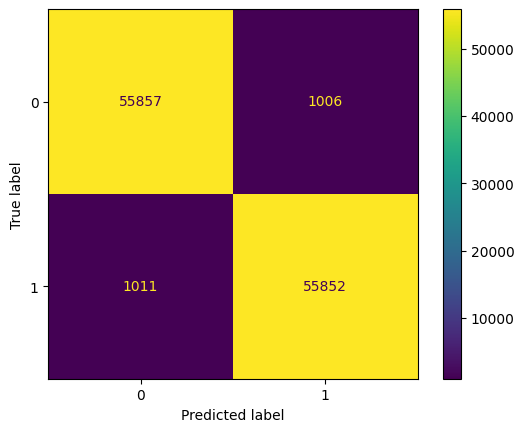

In [17]:
# Obtain the probabilities of the positive class
y_probs = gb_clf.predict_proba(X_test)[:, 1]

# Define a range of decision thresholds
thresholds = np.arange(0.1, 0.5, 0.01)

# Find the best threshold that minimizes false negatives
best_f1 = 0
best_threshold = 0.5
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    fn = confusion_matrix(y_test, y_pred_threshold)[1][0]  # False negatives are [1][0] in the confusion matrix
    f1 = f1_score(y_test, y_pred_threshold)
    
    # Update the best threshold based on F1-score and minimum false negatives
    if f1 > best_f1 and fn < 1718:  # 1718 is the number of false negatives you provided
        best_f1 = f1
        best_threshold = threshold

best_accuracy = accuracy_score(y_test, y_pred_threshold)
best_precision = precision_score(y_test, y_pred_threshold)
best_recall = recall_score(y_test, y_pred_threshold)
best_roc_auc = roc_auc_score(y_test, y_pred_threshold)

print(f"Best Threshold: {best_threshold}")
print(f"Best F1-Score: {best_f1}")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"ROC AUC Score: {best_roc_auc}")

# Predict again using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Print the new confusion matrix
print("New Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best))
disp.plot()
plt.show()


In [19]:
# Select the top important features
top_features = ['V14', 'V4', 'V10', 'V12', 'V3', 'V17', 'V8', 'V1', 'V11']

# Create new training and testing sets with the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize the Gradient Boosting classifier again
gb_clf_top = GradientBoostingClassifier(random_state=42)

# Train the classifier on the new training data
gb_clf_top.fit(X_train_top, y_train)

# Make predictions with the new classifier, using the threshold of 0.38
y_pred_prob = gb_clf_top.predict_proba(X_test_top)[:, 1]  # get probabilities for the positive class
y_pred_new_threshold = (y_pred_prob >= 0.38).astype(int)  # apply threshold to get new predictions

# Evaluate the classifier with the new threshold
accuracy_new = accuracy_score(y_test, y_pred_new_threshold)
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_new = f1_score(y_test, y_pred_new_threshold)
roc_auc_new = roc_auc_score(y_test, y_pred_new_threshold)

# Print evaluation metrics with the new threshold
print(f"Accuracy with top features and new threshold: {accuracy_new:.4f}")
print(f"Precision with top features and new threshold: {precision_new:.4f}")
print(f"Recall with top features and new threshold: {recall_new:.4f}")
print(f"F1-Score with top features and new threshold: {f1_new:.4f}")
print(f"ROC AUC Score with top features and new threshold: {roc_auc_new:.4f}")

# Additionally, print the classification report and confusion matrix with the new threshold
print("\nClassification Report with new threshold:\n", classification_report(y_test, y_pred_new_threshold))
print("Confusion Matrix with new threshold:\n", confusion_matrix(y_test, y_pred_new_threshold))


Accuracy with top features and new threshold: 0.9742
Precision with top features and new threshold: 0.9742
Recall with top features and new threshold: 0.9742
F1-Score with top features and new threshold: 0.9742
ROC AUC Score with top features and new threshold: 0.9742

Classification Report with new threshold:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     56863
           1       0.97      0.97      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix with new threshold:
 [[55398  1465]
 [ 1467 55396]]


In [ ]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [1.0],
}

# Initialize the random search
random_search = RandomizedSearchCV(
    estimator=gb_clf, 
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings that are sampled
    cv=2,       # 3-fold cross-validation
    scoring='recall',  # You can choose to optimize for recall to reduce false negatives
    random_state=42,
    verbose=1
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best model after random search
best_gb_clf = random_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_gb_clf.predict(X_test)

# Re-calculate the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the improved metrics
print(f"Improved Accuracy: {accuracy_best:.4f}")
print(f"Improved Precision: {precision_best:.4f}")
print(f"Improved Recall: {recall_best:.4f}")
print(f"Improved F1-Score: {f1_best:.4f}")
print(f"Improved ROC AUC Score: {roc_auc_best:.4f}")

# Print the best parameters
print("\nBest parameters found: ", random_search.best_params_)